# Задача предсказания сорта винограда

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

C:\Users\morgachev\Miniconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\morgachev\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_wine = pd.read_csv("../../data/wine.data", header=None)

In [3]:
y = data_wine.loc[:, 0]
X = data_wine.loc[:, data_wine.columns!=0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
k_neigh_classifier = KNeighborsClassifier()
k_neigh_classifier.fit(X_train, y_train)
y_pred = k_neigh_classifier.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=True)
print("Accuracy score: {:.2f}".format(score))

Accuracy score: 0.68


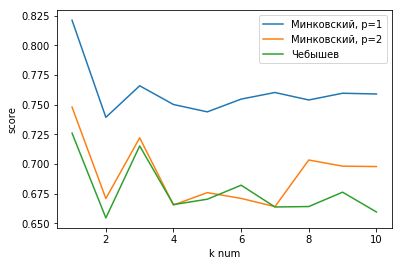

In [5]:
MAX_K = 10
x_graph = np.linspace(1, MAX_K, MAX_K)
score_p1 = np.zeros(MAX_K)
score_p2 = np.zeros(MAX_K)
score_ch = np.zeros(MAX_K)

for k in range(1, MAX_K + 1):
    k_neigh_classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=1)
    score_p1[k-1] = cross_val_score(X=X, y=y, estimator=k_neigh_classifier, scoring="accuracy", cv=10).mean()
    
    k_neigh_classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
    score_p2[k-1] = cross_val_score(X=X, y=y, estimator=k_neigh_classifier, scoring="accuracy", cv=10).mean()
    
    k_neigh_classifier = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    score_ch[k-1] = cross_val_score(X=X, y=y, estimator=k_neigh_classifier, scoring="accuracy", cv=10).mean()
    
plt.plot(x_graph, score_p1, label="Минковский, p=1")
plt.plot(x_graph, score_p2, label="Минковский, p=2")
plt.plot(x_graph, score_ch, label="Чебышев")
plt.legend()

plt.xlabel("k num")
plt.ylabel("score")

plt.show()

# Поиск оптимального параметра

In [6]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

C:\Users\morgachev\Miniconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [7]:
score = cross_val_score(X=X, y=y, estimator=clf, scoring="accuracy", cv=10).mean()
print("Accuracy score: {:.2f}".format(score))

Accuracy score: 0.75


# Задание 3

In [8]:
MAX_K = 20
num_splitting = 20
split_size = 0.2
score = "accuracy"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)

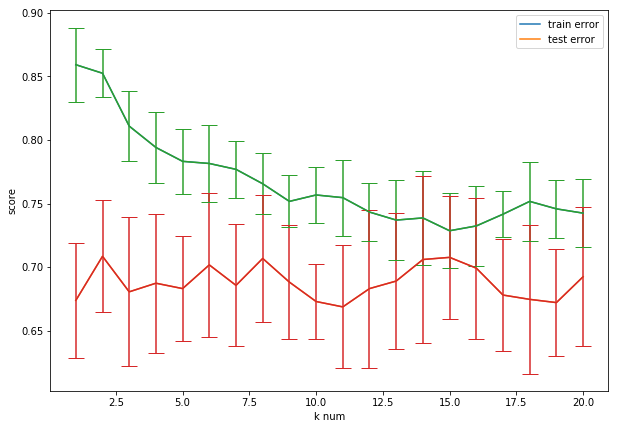

In [9]:
plt.figure(figsize=(10, 7))

x = np.linspace(1, MAX_K, MAX_K)
test_stds = np.zeros(MAX_K)
train_stds = np.zeros(MAX_K)
test_errors = np.zeros(MAX_K)
train_errors = np.zeros(MAX_K)

def kneighbors_std(k):
    train_errors = np.zeros(num_splitting)
    test_errors = np.zeros(num_splitting)

    for i in range(num_splitting):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        clf = KNeighborsClassifier(n_neighbors=k+1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        test_errors[i] = accuracy_score(y_pred=y_pred, y_true=y_test)
        y_pred = clf.predict(X_train)
        train_errors[i] = accuracy_score(y_pred=y_pred, y_true=y_train) 
    return train_errors.mean(), np.std(train_errors, ddof=1), test_errors.mean(), np.std(test_errors, ddof=1) 

for k in range(MAX_K):
    tr_err, tr_std, test_err, test_std =  kneighbors_std(k+1)    
    test_stds[k] = test_std
    train_stds[k] = tr_std
    test_errors[k] = test_err
    train_errors[k] = tr_err

plt.plot(x, train_errors, label="train error")
plt.plot(x, test_errors, label="test error")

plt.errorbar(x, train_errors, yerr=train_stds, capsize=8)
plt.errorbar(x, test_errors, yerr=test_stds, capsize=8)

plt.xlabel("k num")
plt.ylabel("score")
plt.legend()

# plt.savefig("std_err_kneighbors")
plt.show()

# Тоже самое для Random Forest

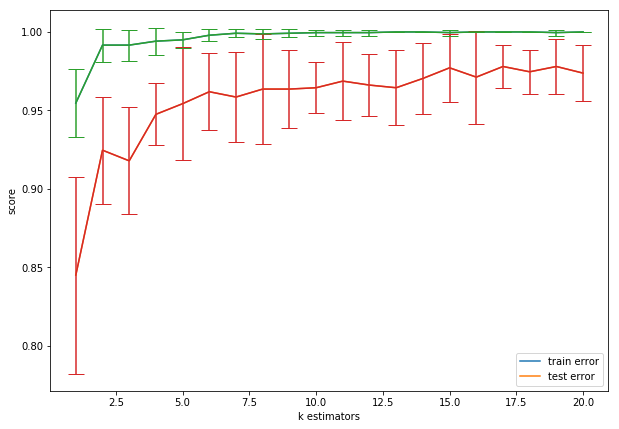

In [10]:
plt.figure(figsize=(10, 7))

x = np.linspace(1, MAX_K, MAX_K)
test_stds = np.zeros(MAX_K)
train_stds = np.zeros(MAX_K)
test_errors = np.zeros(MAX_K)
train_errors = np.zeros(MAX_K)

def random_forest_std(k):
    train_errors = np.zeros(num_splitting)
    test_errors = np.zeros(num_splitting)

    for i in range(num_splitting):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        clf = RandomForestClassifier(n_estimators=k+1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        test_errors[i] = accuracy_score(y_pred=y_pred, y_true=y_test)
        y_pred = clf.predict(X_train)
        train_errors[i] = accuracy_score(y_pred=y_pred, y_true=y_train) 
    return train_errors.mean(), np.std(train_errors, ddof=1), test_errors.mean(), np.std(test_errors, ddof=1) 

for k in range(MAX_K):
    tr_err, tr_std, test_err, test_std =  random_forest_std(k+1)    
    test_stds[k] = test_std
    train_stds[k] = tr_std
    test_errors[k] = test_err
    train_errors[k] = tr_err

plt.plot(x, train_errors, label="train error")
plt.plot(x, test_errors, label="test error")

plt.errorbar(x, train_errors, yerr=train_stds, capsize=8)
plt.errorbar(x, test_errors, yerr=test_stds, capsize=8)

plt.xlabel("k estimators")
plt.ylabel("score")
plt.legend()

# plt.savefig("std_err_random_forest")
plt.show()